# Perform Gene Set Enrichment Analysis for gene expression (GEX) data

### https://gseapy.readthedocs.io/en/latest/gseapy_example.html
### https://medium.com/omics-diary/how-to-use-gseapy-for-pathway-enrichment-analysis-67a1aab1002d

In [1]:
# Data Science Tools
%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("DGE_NKT HER2.csv", skiprows=0)
df.set_index(['gene'], inplace=True)
df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
gene,,,,,
TLR2,2.339838e-08,4.570526,0.517,0.000,5.989984e-06
PYCR1,5.405435e-14,3.680523,0.758,0.061,1.383791e-11
LIF,6.650508e-16,2.985420,0.974,0.576,1.702530e-13
HLA-DQB1,2.663117e-18,2.810732,0.965,0.394,6.817580e-16
SEMA7A,1.371684e-10,2.737932,0.774,0.182,3.511512e-08
...,...,...,...,...,...
CXCR1,1.978760e-05,-5.263945,0.001,0.030,5.065626e-03
IL5,1.978760e-05,-5.263945,0.001,0.030,5.065626e-03
CCL3,2.332556e-39,-5.486337,0.030,0.485,5.971343e-37


In [3]:
Genes = df[(df['avg_log2FC'] > 1) & (df['p_val_adj'] < 0.05)].index.tolist()
print(f"Genes are: {Genes}\n")

Genes are: ['TLR2', 'PYCR1', 'LIF', 'HLA-DQB1', 'SEMA7A', 'HLA-DRB3', 'HLA-DMA', 'CCL2', 'LAP3', 'FOXO3', 'NT5E', 'TRIB2', 'CD9', 'IER3', 'HLA-DMB', 'ICAM1', 'HLA-DRA', 'HLA-DQA1', 'FOSL1', 'EGR3', 'IL15RA', 'LGALS3', 'STAT1', 'CXCL8', 'NAMPT', 'HLA-DPB1', 'HLA-DPA1', 'LGALS1', 'FYN', 'ANXA5', 'CD44']



In [4]:
# GO Biological Process
enr_GOBP_Genes = gp.enrichr(gene_list=Genes,
                               gene_sets=['GO_Biological_Process_2025'],
                               organism='Human',
                               cutoff=0.05
                               )

In [5]:
enr_GOBP_Genes.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2025,Positive Regulation of Leukocyte Cell-Cell Adh...,8/48,4.504297e-15,2.346739e-12,0,0,173.295652,5724.604304,HLA-DMA;HLA-DMB;HLA-DRA;CCL2;HLA-DRB3;CD44;HLA...
1,GO_Biological_Process_2025,MHC Class II Protein Complex Assembly (GO:0002...,6/13,1.411134e-14,2.450669e-12,0,0,684.411429,21827.110818,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
2,GO_Biological_Process_2025,Peptide Antigen Assembly With MHC Class II Pro...,6/13,1.411134e-14,2.450669e-12,0,0,684.411429,21827.110818,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
3,GO_Biological_Process_2025,Regulation of T Cell Activation (GO:0050863),8/68,8.645372e-14,1.126060e-11,0,0,115.414493,3471.571823,LGALS3;HLA-DMA;HLA-DMB;HLA-DRA;CCL2;HLA-DRB3;H...
4,GO_Biological_Process_2025,Peptide Antigen Assembly With MHC Protein Comp...,6/18,1.518531e-13,1.582309e-11,0,0,399.140000,11780.961442,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
5,GO_Biological_Process_2025,Positive Regulation of Lymphocyte Activation (...,7/50,9.891545e-13,8.589158e-11,0,0,135.156977,3735.999128,HLA-DMA;HLA-DMB;HLA-DRA;CCL2;HLA-DRB3;HLA-DQA1...
6,GO_Biological_Process_2025,Antigen Processing and Presentation of Exogeno...,6/25,1.437924e-12,1.070227e-10,0,0,252.000000,6871.490734,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
7,GO_Biological_Process_2025,Antigen Processing and Presentation of Peptide...,6/27,2.398269e-12,1.561872e-10,0,0,227.977143,6099.818920,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
8,GO_Biological_Process_2025,Antigen Processing and Presentation of Exogeno...,6/31,5.939928e-12,3.438558e-10,0,0,191.462400,4949.173646,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...
9,GO_Biological_Process_2025,Positive Regulation of Immune System Process (...,6/41,3.588888e-11,1.869810e-09,0,0,136.690286,3287.482526,HLA-DMA;HLA-DMB;HLA-DRA;HLA-DRB3;HLA-DQA1;HLA-...


In [6]:
df = enr_GOBP_Genes.results
# df = df.iloc[16:]
# df = df[df['Combined Score'] < 1500]
df.head(13).to_excel('enr_GOBP.results.xlsx')

/opt/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:658: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[colname].replace(
/opt/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:658: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(


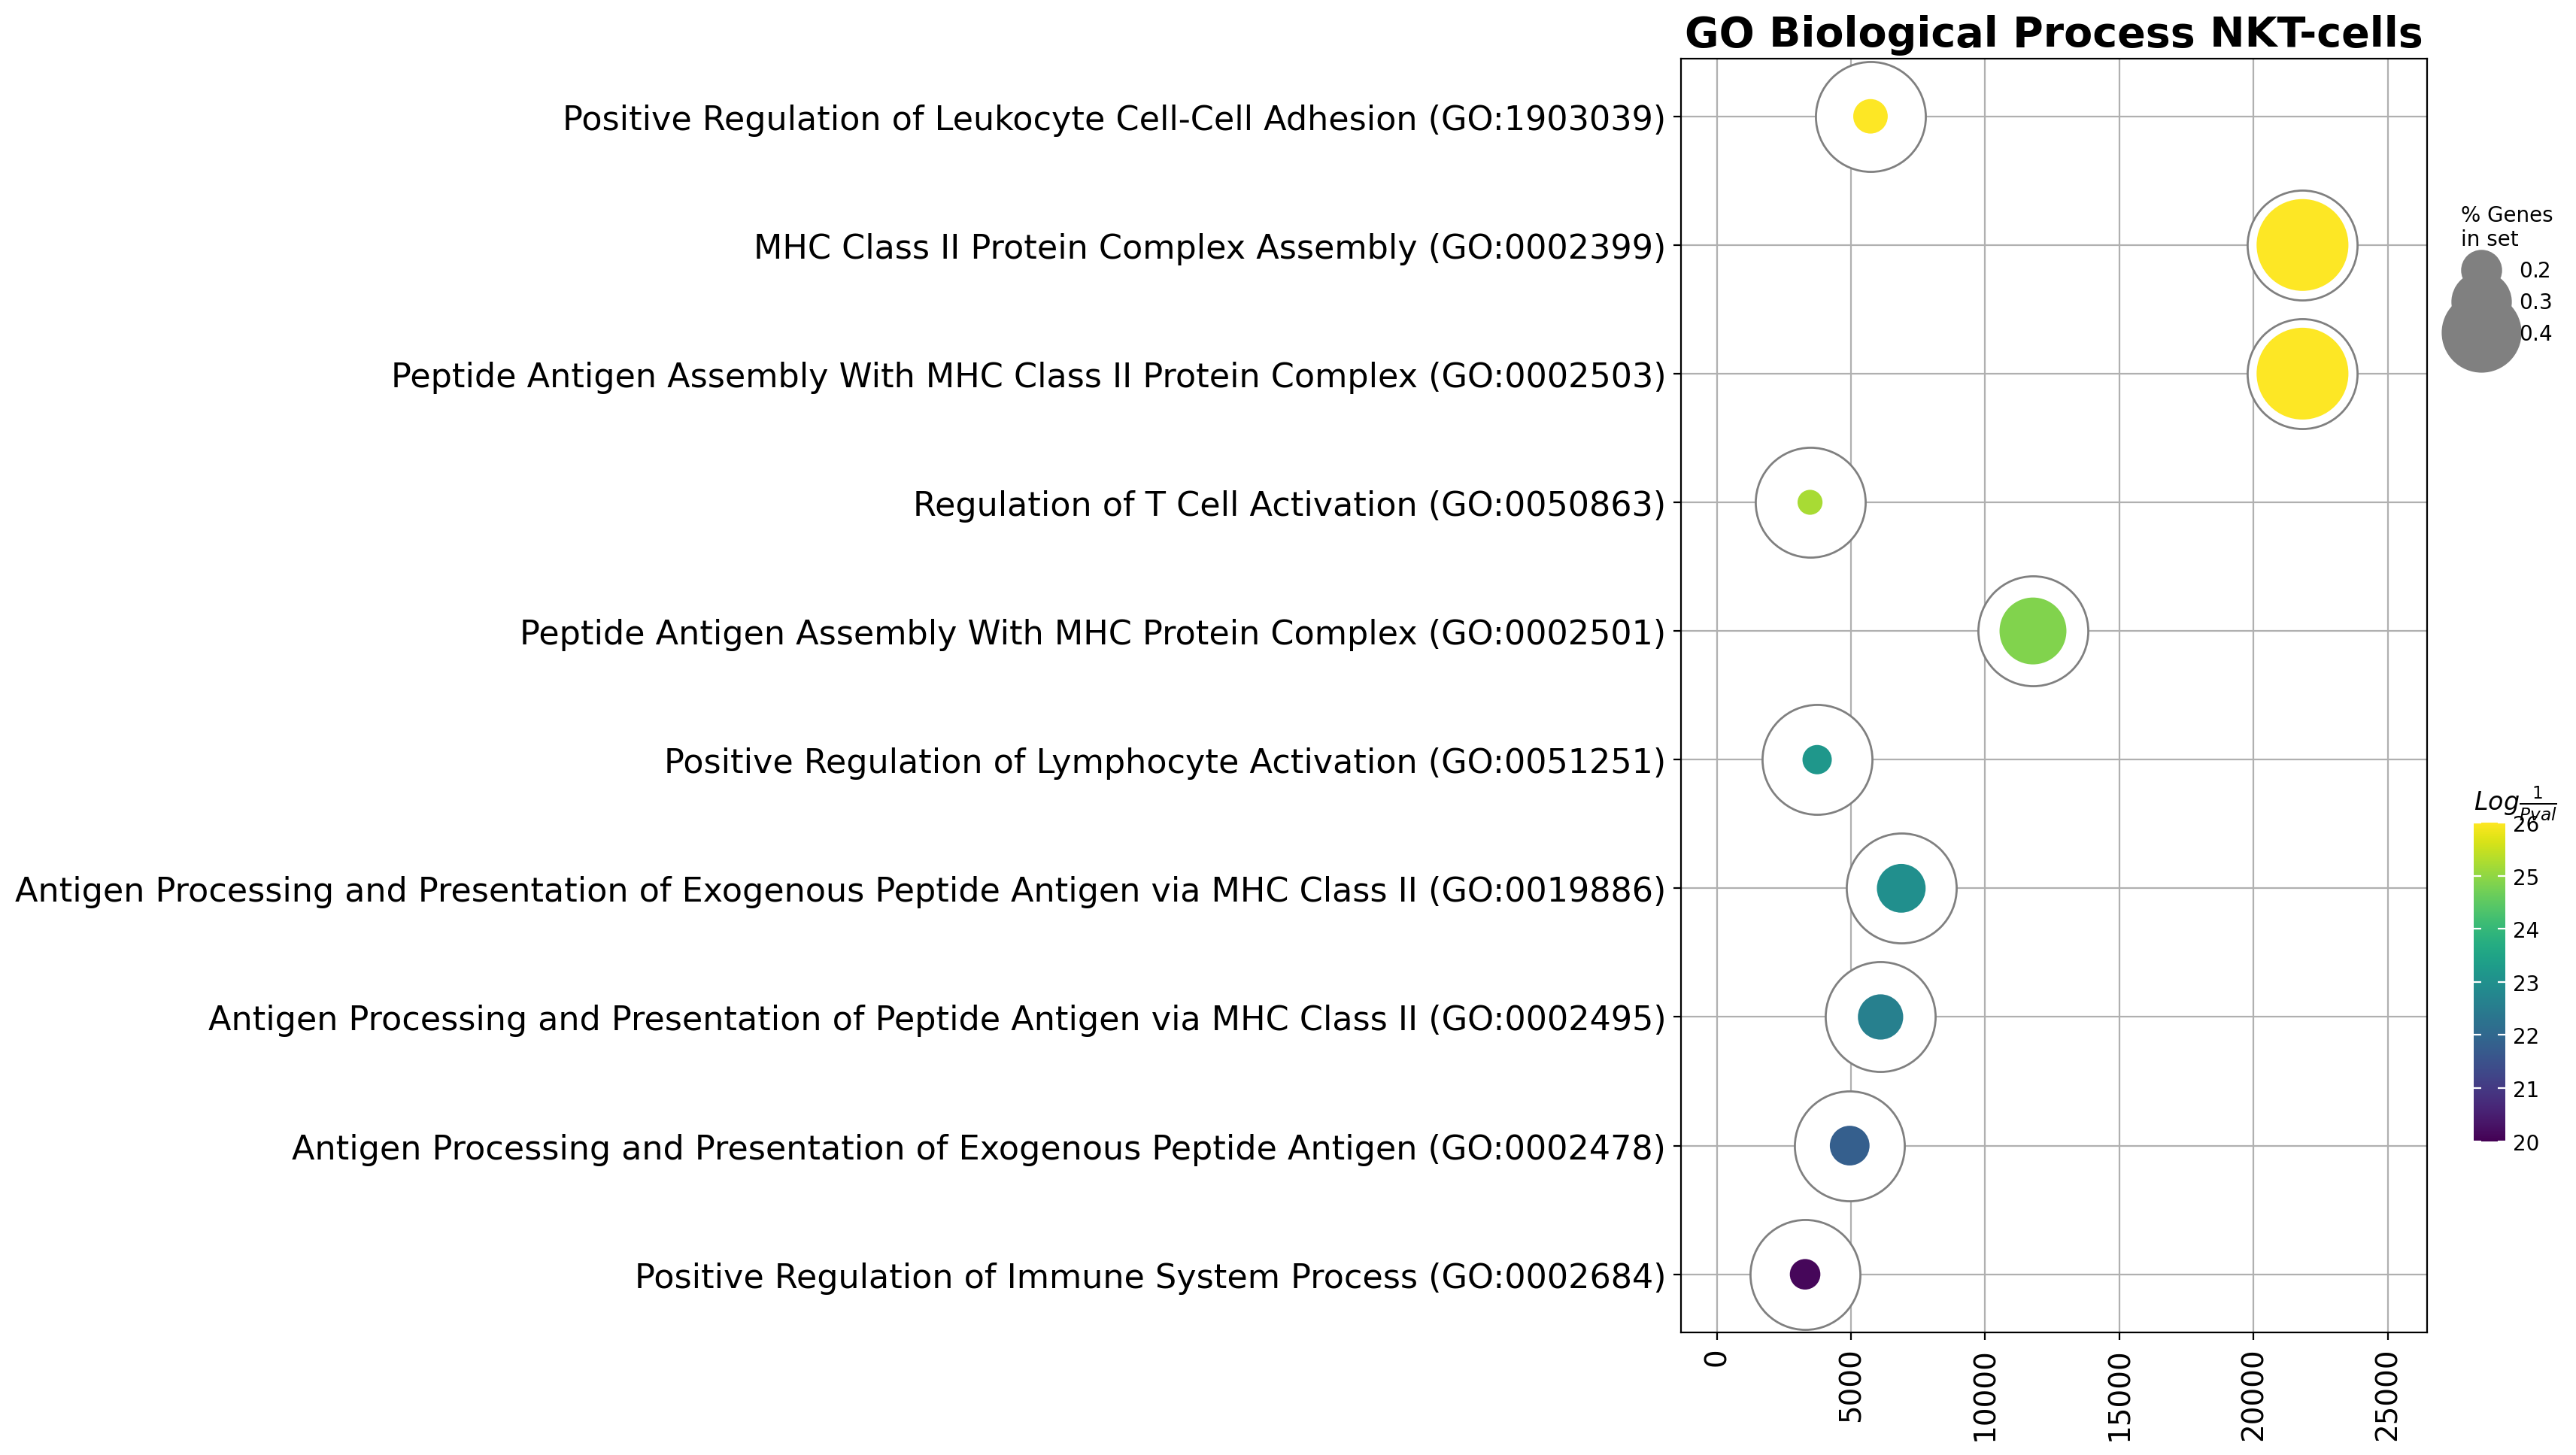

In [7]:
from gseapy import ringplot
ax = ringplot(df,
              column="Adjusted P-value",
              cmap='viridis', 
              size=35,
              top_term=10,
              figsize=(8,11),
              title = "GO Biological Process NKT-cells"
             )
plt.savefig('GO Biological Process NKT.png', bbox_inches='tight', dpi=600)

In [50]:
# GO Biological Process
enr_KEGG_Genes = gp.enrichr(gene_list=Genes,
                               gene_sets=['KEGG_2019_Mouse'],
                               organism='Mouse',
                               cutoff=0.05
                               )

In [51]:
kegg = enr_KEGG_Genes.results
# kegg = kegg.iloc[16:]
# df = df[df['Combined Score'] < 1500]
kegg.head(13).to_excel('enr_KEGG.results.xlsx')

/opt/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:658: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[colname].replace(
/opt/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:658: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(


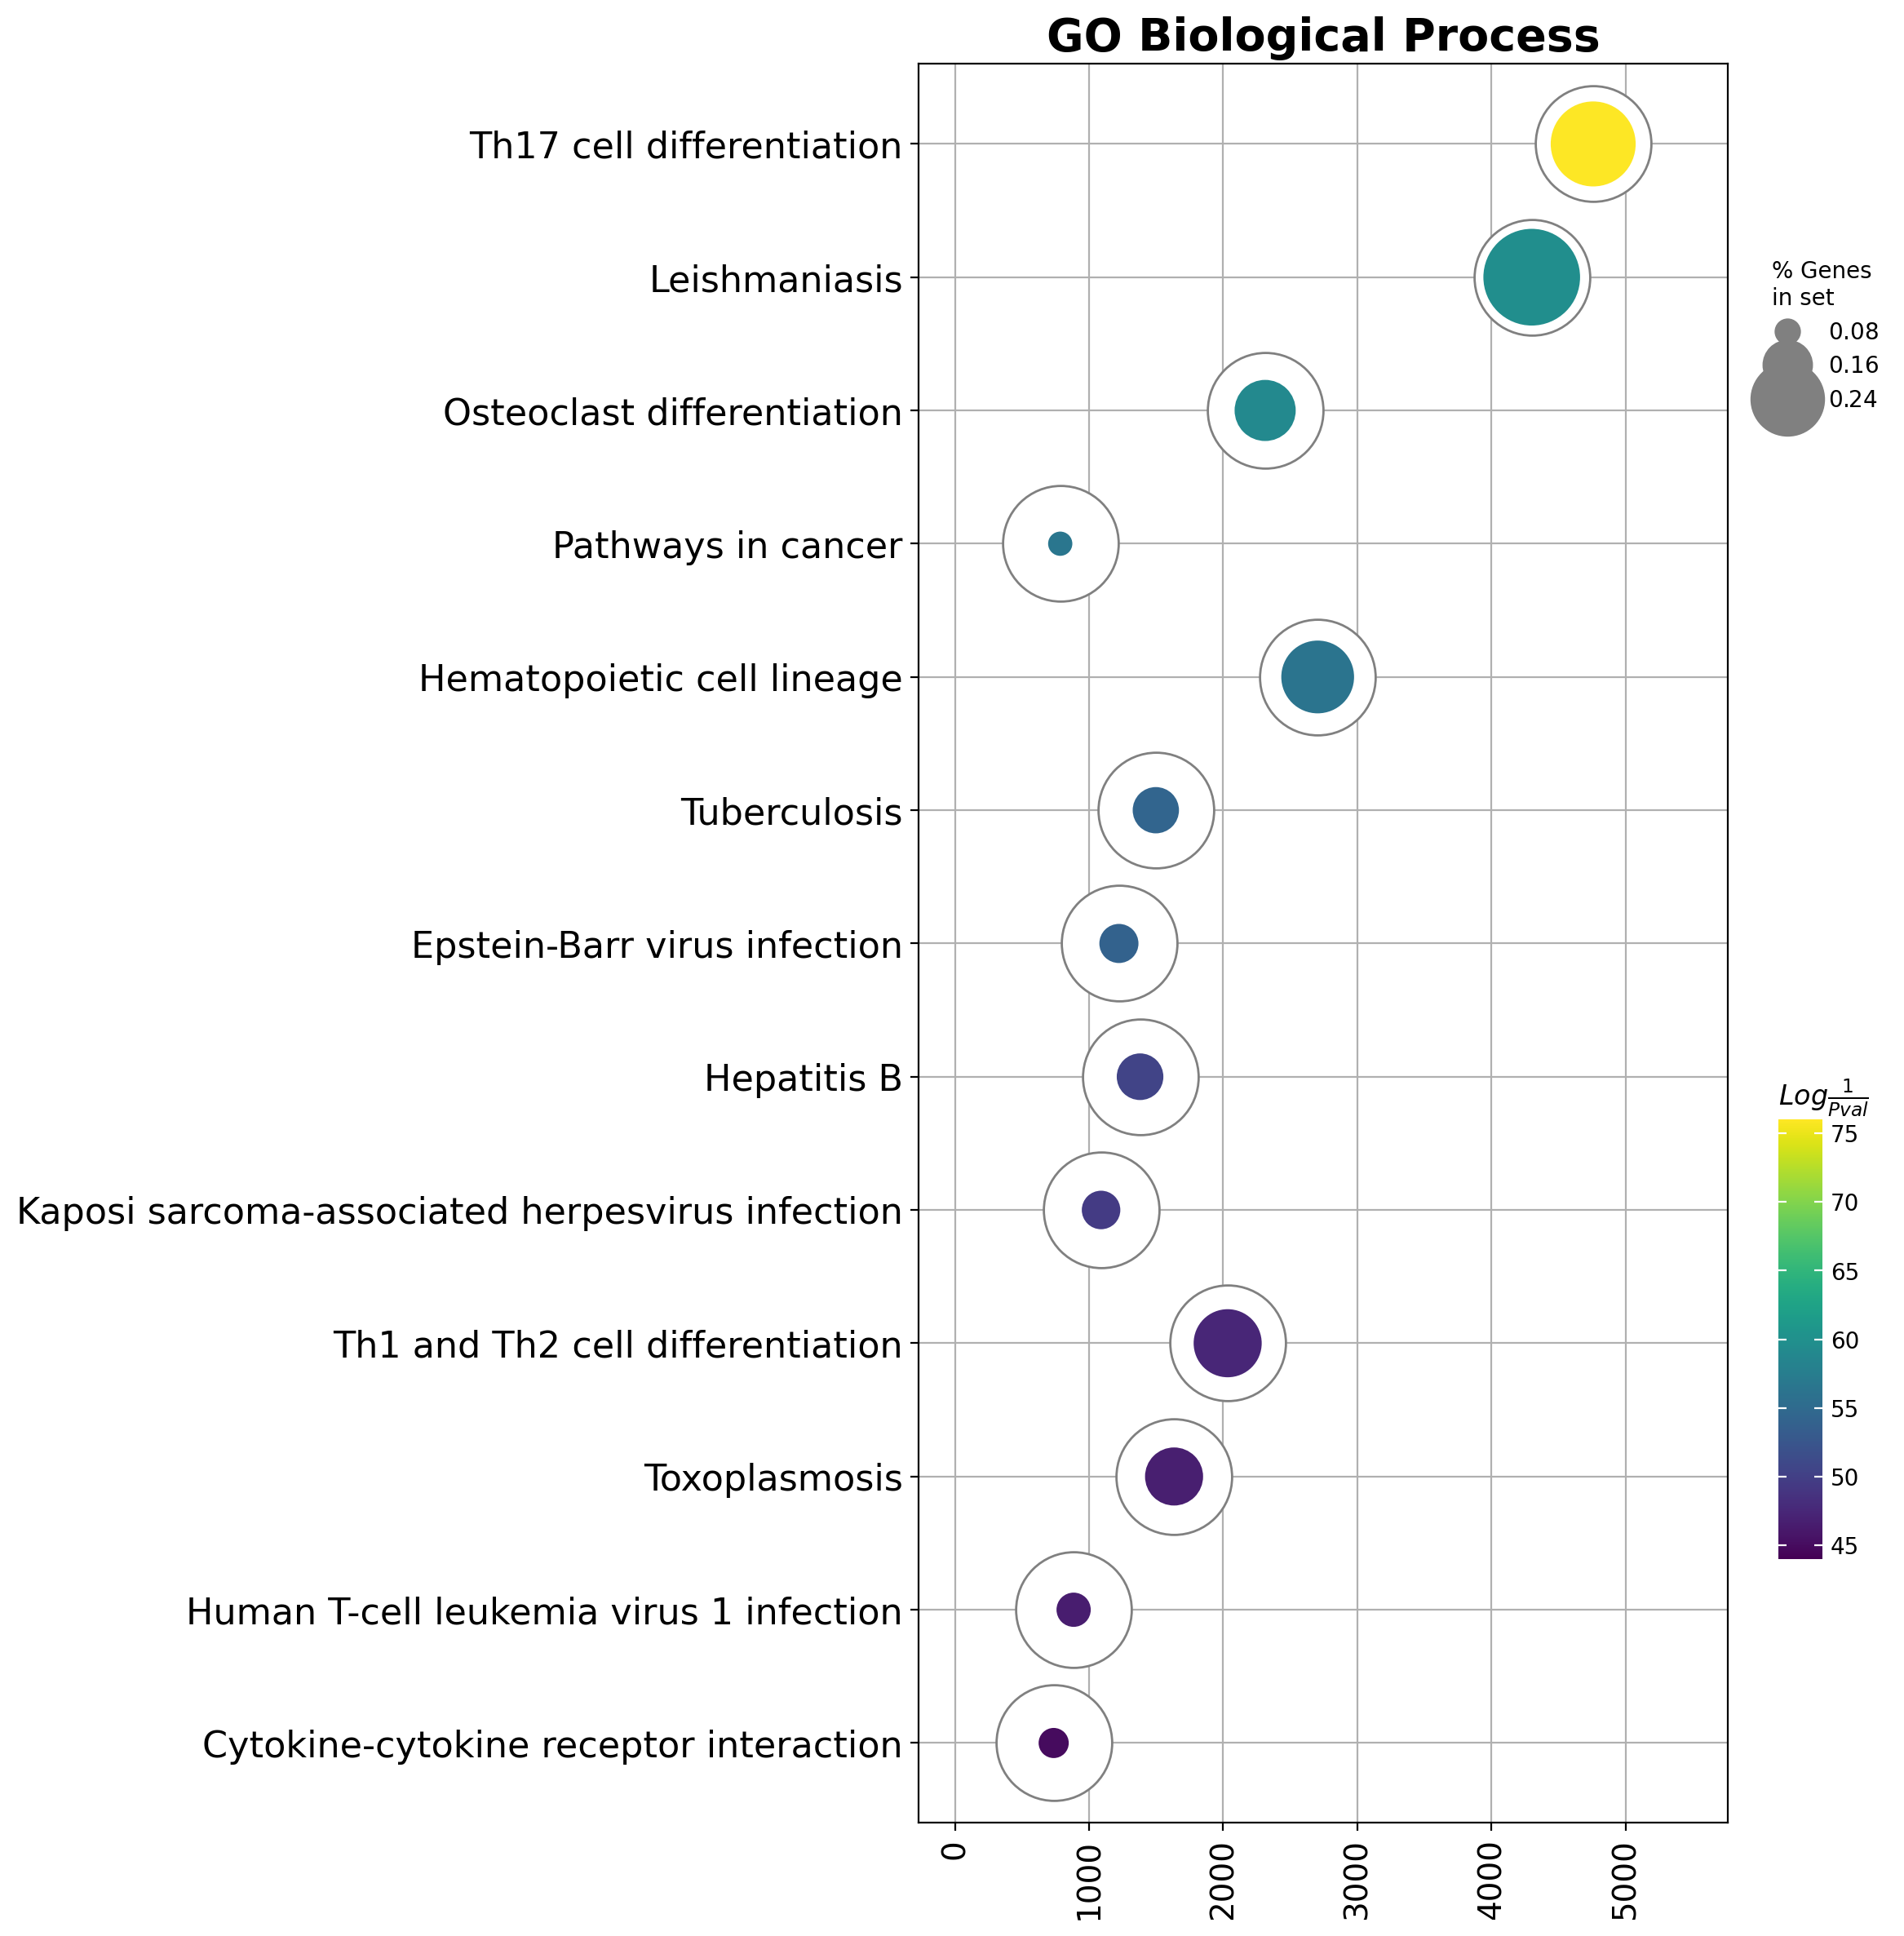

In [52]:
from gseapy import ringplot
ax = ringplot(kegg,
              column="Adjusted P-value",
              cmap='viridis', 
              size=50,
              top_term=13,
              figsize=(8,14),
              title = "GO Biological Process"
             )
plt.savefig('KEGG Eb.png', bbox_inches='tight', dpi=600)